## I was also interested in analyzing if those Spanish regions with less income and higher unemployment rate were also the ones hardest hit by domestic violence

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## I download the data from the National Institute of Statistics (INE, in Spanish)

In [2]:
df = pd.read_csv('average_net_annual_income.csv')

In [3]:
df.head()

,autonomous_community,year,average_net_annual_income
0,Andalucía,2020,11804
1,Andalucía,2019,10892
2,Andalucía,2018,10962
3,Andalucía,2017,10831
4,Andalucía,2016,9978


In [5]:
df_unemp = pd.read_csv('unemployment_gender_rate.csv')

In [6]:
df_unemp.gender.value_counts()

men      228
women    228
Name: gender, dtype: int64

In [22]:
# isolate only unemployment for women
df_women =df_unemp[df_unemp.gender=='women']
df_women.head()

,autonomous_community,gender,year,unemployment_rate
12,Andalucía,women,2021,26.7
13,Andalucía,women,2020,25.2
14,Andalucía,women,2019,25.4
15,Andalucía,women,2018,28.6
16,Andalucía,women,2017,30.3


In [10]:
df_women =df_women.drop(['gender'], axis=1)
df_women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 12 to 455
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   autonomous_community  228 non-null    object 
 1   year                  228 non-null    int64  
 2   unemployment_rate     228 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.1+ KB


In [11]:
# merge both dataframes
df_merged = df.merge(df_women, how='inner',on=(['year', 'autonomous_community']))

In [24]:
df_merged.tail()

,autonomous_community,year,average_net_annual_income,unemployment_rate
193,Melilla,2014,13052,26.7
194,Melilla,2013,12564,29.4
195,Melilla,2012,12867,34.6
196,Melilla,2011,13346,23.5
197,Melilla,2010,12839,30.8


## Some exploratory analysis, unemployment among female population

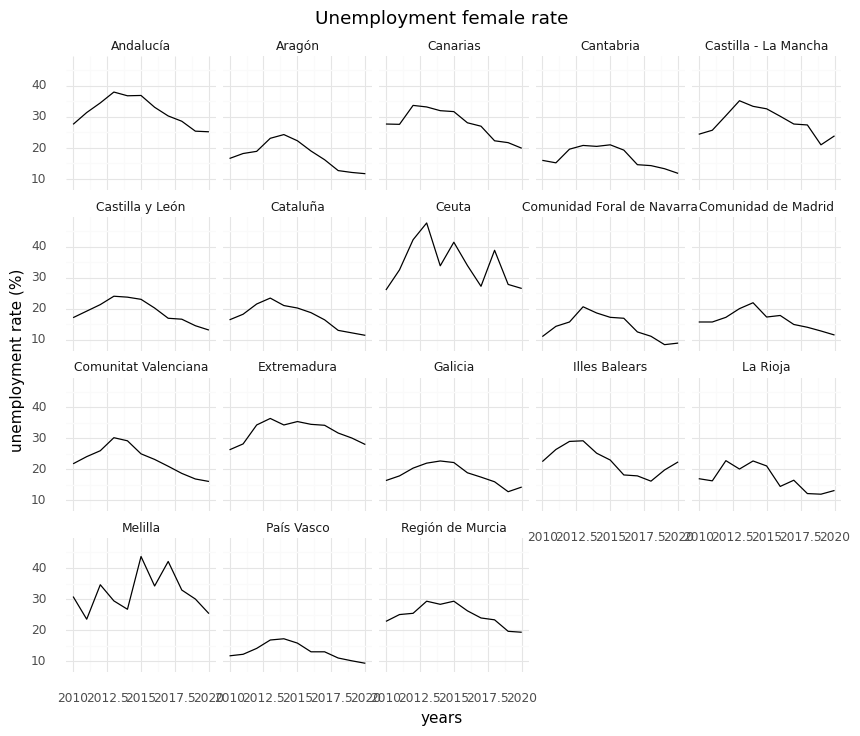

<ggplot: (302327520)>

In [37]:

from plotnine import *
display(
    ggplot(df_merged,             
        aes('year', 'unemployment_rate'))
        + geom_line() 
        + theme_minimal()
        + theme(figure_size=(10, 8))
        + facet_wrap('autonomous_community')
        + labs(
           title = "Unemployment female rate",
         y = "unemployment rate (%)",
          x = "years"
       )
) 

## A look into household average annual income

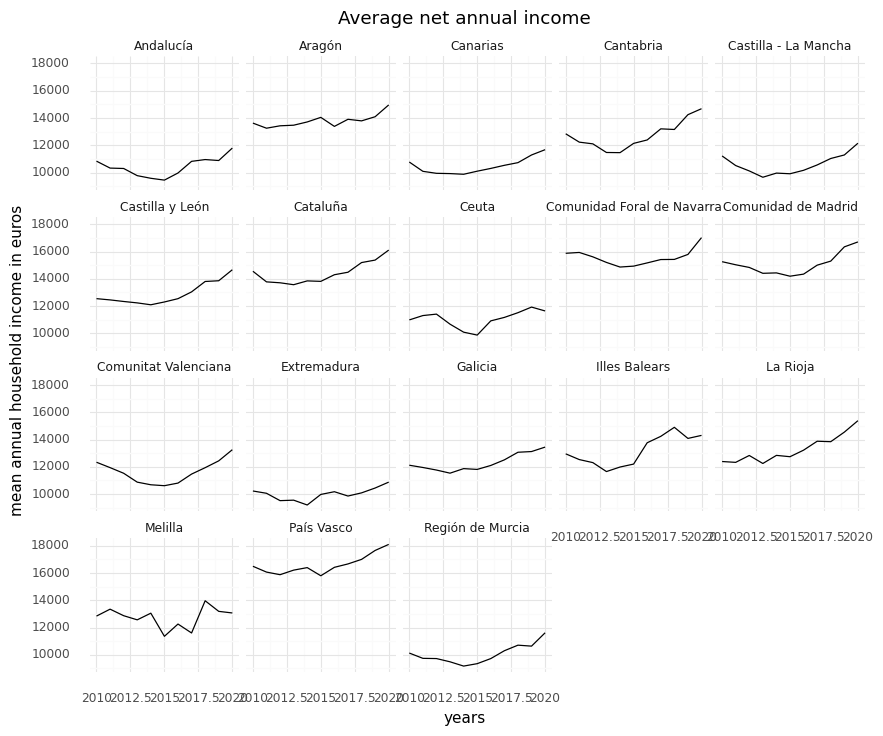

<ggplot: (301963337)>

In [28]:
from plotnine import *
display(
    ggplot(df_merged,             
        aes('year', 'average_net_annual_income'))
        + geom_line() 
        + theme_minimal()
        + theme(figure_size=(10, 8))
        + facet_wrap('autonomous_community')
 + labs(
  title = "Average net annual income",
   y = "mean annual household income in euros",
          x = "years"
     )
) 

## Finally I was curious to see how many of the women killed by an intimate partner or ex-partner had made a complaint to the police

In [15]:
df_complaints = pd.read_csv('pre_complaints.csv')
df_complaints.head()

,territory,no_complaint,yes_complaint
0,Andalucía,144,42
1,Aragón,16,6
2,Asturias,22,3
3,Balears Islands,23,7
4,Canary Islands,43,17


In [16]:
df_complaints['total'] = df_complaints['no_complaint'] + df_complaints['yes_complaint']

In [17]:
df_complaints.head()

,territory,no_complaint,yes_complaint,total
0,Andalucía,144,42,186
1,Aragón,16,6,22
2,Asturias,22,3,25
3,Balears Islands,23,7,30
4,Canary Islands,43,17,60


In [29]:
# percentages of yes and no
df_complaints['pct_yes_complaint'] = (df_complaints['yes_complaint'] *100 / df_complaints['total']).round(2)
df_complaints['pct_no_complaint'] = (df_complaints['no_complaint'] *100 / df_complaints['total']).round(2)

In [44]:
df_complaints.head(20)

,territory,no_complaint,yes_complaint,total,pct_yes_complaint,pct_no_complaint
0,Andalucía,144,42,186,22.58,77.42
1,Aragón,16,6,22,27.27,72.73
2,Asturias,22,3,25,12.00,88.00
3,Balears Islands,23,7,30,23.33,76.67
4,Canary Islands,43,17,60,28.33,71.67
5,Cantabria,5,3,8,37.50,62.50
6,Castilla y León,36,9,45,20.00,80.00
7,Castilla-La Mancha,28,12,40,30.00,70.00
8,Cataluña,112,35,147,23.81,76.19
9,Region of Valencia,84,38,122,31.15,68.85


In [20]:
df_complaints.to_csv("pct_precomplaint.csv", index=False)

In [32]:
# according to the median, only 27% of the victims had complained in comparison to 72.7%
df_complaints.pct_yes_complaint.median()

27.27

In [33]:
df_complaints.pct_no_complaint.median()

72.73